In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import random
import sklearn.metrics as met
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
cd Kaggle_project/House_price_prediction

[WinError 3] Системе не удается найти указанный путь: 'Kaggle_project/House_price_prediction'
C:\Users\Сергей\Desktop\Kaggle_project\House_price_prediction


## Преобразование тренировочных данных
Преобразуем данные для тренировки по отедльности для каждого из 3-х типов

In [3]:
train = pd.read_csv('train.csv')
print(train.shape)
print(train.dropna().shape) # стало быть нужно заполнять пропуски

train_id = train['Id']
train_target = train['SalePrice'] # целевая переменная
train.drop(labels=['Id', 'SalePrice'], axis=1, inplace=True)
train.head()

(1460, 81)
(0, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
test = pd.read_csv('test.csv')
print(test.shape)
test_id = test['Id']

test.drop(labels=['Id'], axis=1, inplace=True)
test.head()

(1459, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
data = pd.concat([train, test]).reset_index(drop=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
# делим данные по типу на строки и  числа
num_data = data.select_dtypes(exclude = 'object')
cat_data = data.select_dtypes(include = 'object')

cat_features, num_features = list(cat_data.columns), list(num_data.columns)

In [7]:
#data.info()

## Категориальные признаки

In [8]:
data['FireplaceQu'].fillna('NA', inplace=True)
data['MiscFeature'].fillna('NA', inplace=True)
data['Alley'].fillna('NA', inplace=True)
data['Fence'].fillna('NA', inplace=True)
data['PoolQC'].fillna('NA', inplace=True)


data["Fireplaces"].fillna('TA',inplace=True)

In [9]:
data['is_2nd_floor'] = (data['2ndFlrSF'] == 0)*1
data['is_fireplace'] = (data['Fireplaces'] == 0)*1

In [10]:
# NA = No Basement
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    data[col].fillna(0, inplace=True)

print(len(data['TotalBsmtSF'][data['TotalBsmtSF'] == 0]), 'Домов не имеют подвала')

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    data[col].fillna('NA', inplace=True)

data['is_Bsmt'] = (data['TotalBsmtSF'] == 0)*1 # Признак есть ли подвал

79 Домов не имеют подвала


In [11]:
#  NA = No Garage
for col in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    data[col].fillna(0, inplace=True)

print(len(data['GarageCars'][data['GarageCars'] == 0]), 'Гараж не имеет место для машины ==> гаража нет')

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col].fillna('NA', inplace=True)
    
data['is_Garage'] = (data['GarageCars'] == 0)*1 # Признак есть ли гараж

158 Гараж не имеет место для машины ==> гаража нет


In [12]:
# Шпона быть не должно, однако у него есть площадь, заменим ее нулем
drop = []
for i in range(data.shape[0]):  
    
    if data['MasVnrType'].values[i] == 'None' and data['MasVnrArea'].values[i] != 0:
        drop.append(i)
        #print(i, data['MasVnrArea'].values[i])

data['MasVnrArea'][data['MasVnrArea'] > 0][data['MasVnrArea'] < 10]
drop.append(1765)

for i in drop:
    data['MasVnrType'].values[i] = 'None'
    data['MasVnrArea'].values[i] = 0

У оставшихся признаков мало (меньше 5) пропусков, их можно заполнить медианой или самыми часто встречающимися значениями

In [13]:
#for col in num_features:
#    if len(np.unique(data[col].fillna(0))) > 20:
#        cat_features.append(col)
#        num_features.remove(col)

In [14]:
imp = SimpleImputer(strategy='most_frequent')
data[cat_features] = imp.fit_transform(data[cat_features])

In [15]:
#fig, axes = plt.subplots(7, 7, figsize=(20, 20), sharey=True)
#for i in range(len(cat_features)):
 #   sns.countplot(x=cat_features[i], data=data, ax=axes[i // 7, i % 7])

## Вещественные признаки 

In [16]:
print(len(data[data.MasVnrArea.values == 0].index))
# больше половины данных - нули, логично 8 недостающих значений ими и заполнить

data.MasVnrArea = data.MasVnrArea.fillna(0)

1746


In [17]:
data['BsmtFullBath'].fillna(0, inplace=True)
data['BsmtHalfBath'].fillna(0, inplace=True)

In [18]:
#data.LotFrontage.describe()

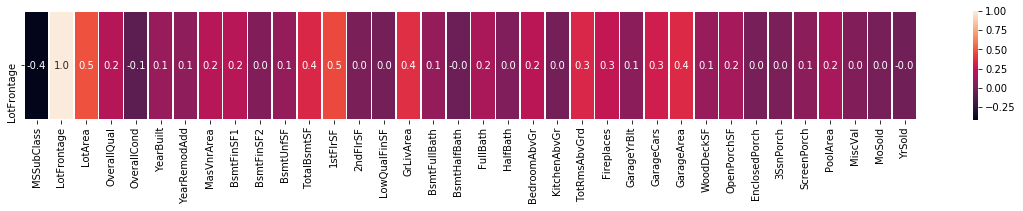

In [19]:
f,ax = plt.subplots(figsize=(20,2))
sns.heatmap(num_data.corr().iloc[1:2,:], annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [20]:
#data["LotFrontage"] = data["LotFrontage"].fillna(data["LotFrontage"].median())

data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [21]:
data[num_features].fillna(0, inplace=True)

### Кодирование категориальных переменных

In [22]:
# Не все категориальные данные имеют тип 'object', некороые закодированы числами
# Например, нет смысла использовать год в модели, его значение может испортить скор, но года нужно отличать, выход - LabelEncoder

#for col in num_features:
#    if len(np.unique(data[col].fillna(0))) > 20:
#        cat_features.append(col)
#        num_features.remove(col)

In [23]:
encoder = LabelEncoder()
for label in cat_features:
    data[label] = encoder.fit_transform(data[label])

In [24]:
#fig, axes = plt.subplots(6, 6, figsize=(40, 40), sharey=True)
#for i in range(len(num_features)):
 #   sns.countplot(x=cat_features[i], data=data, ax=axes[i // 6, i % 6])

## Очистка от выбросов 

In [25]:
train = data[:train.shape[0]]
test = data[train.shape[0]:]

In [27]:
outliers = []

#for i in range(train.shape[0]):
#    if train_target[i] > 500_000:
#        outliers.append(i)

In [28]:
from sklearn.manifold import MDS
mds = MDS(random_state=42, n_jobs=-1)

In [29]:
%%time
mds_train = mds.fit_transform(train)

Wall time: 1min 18s


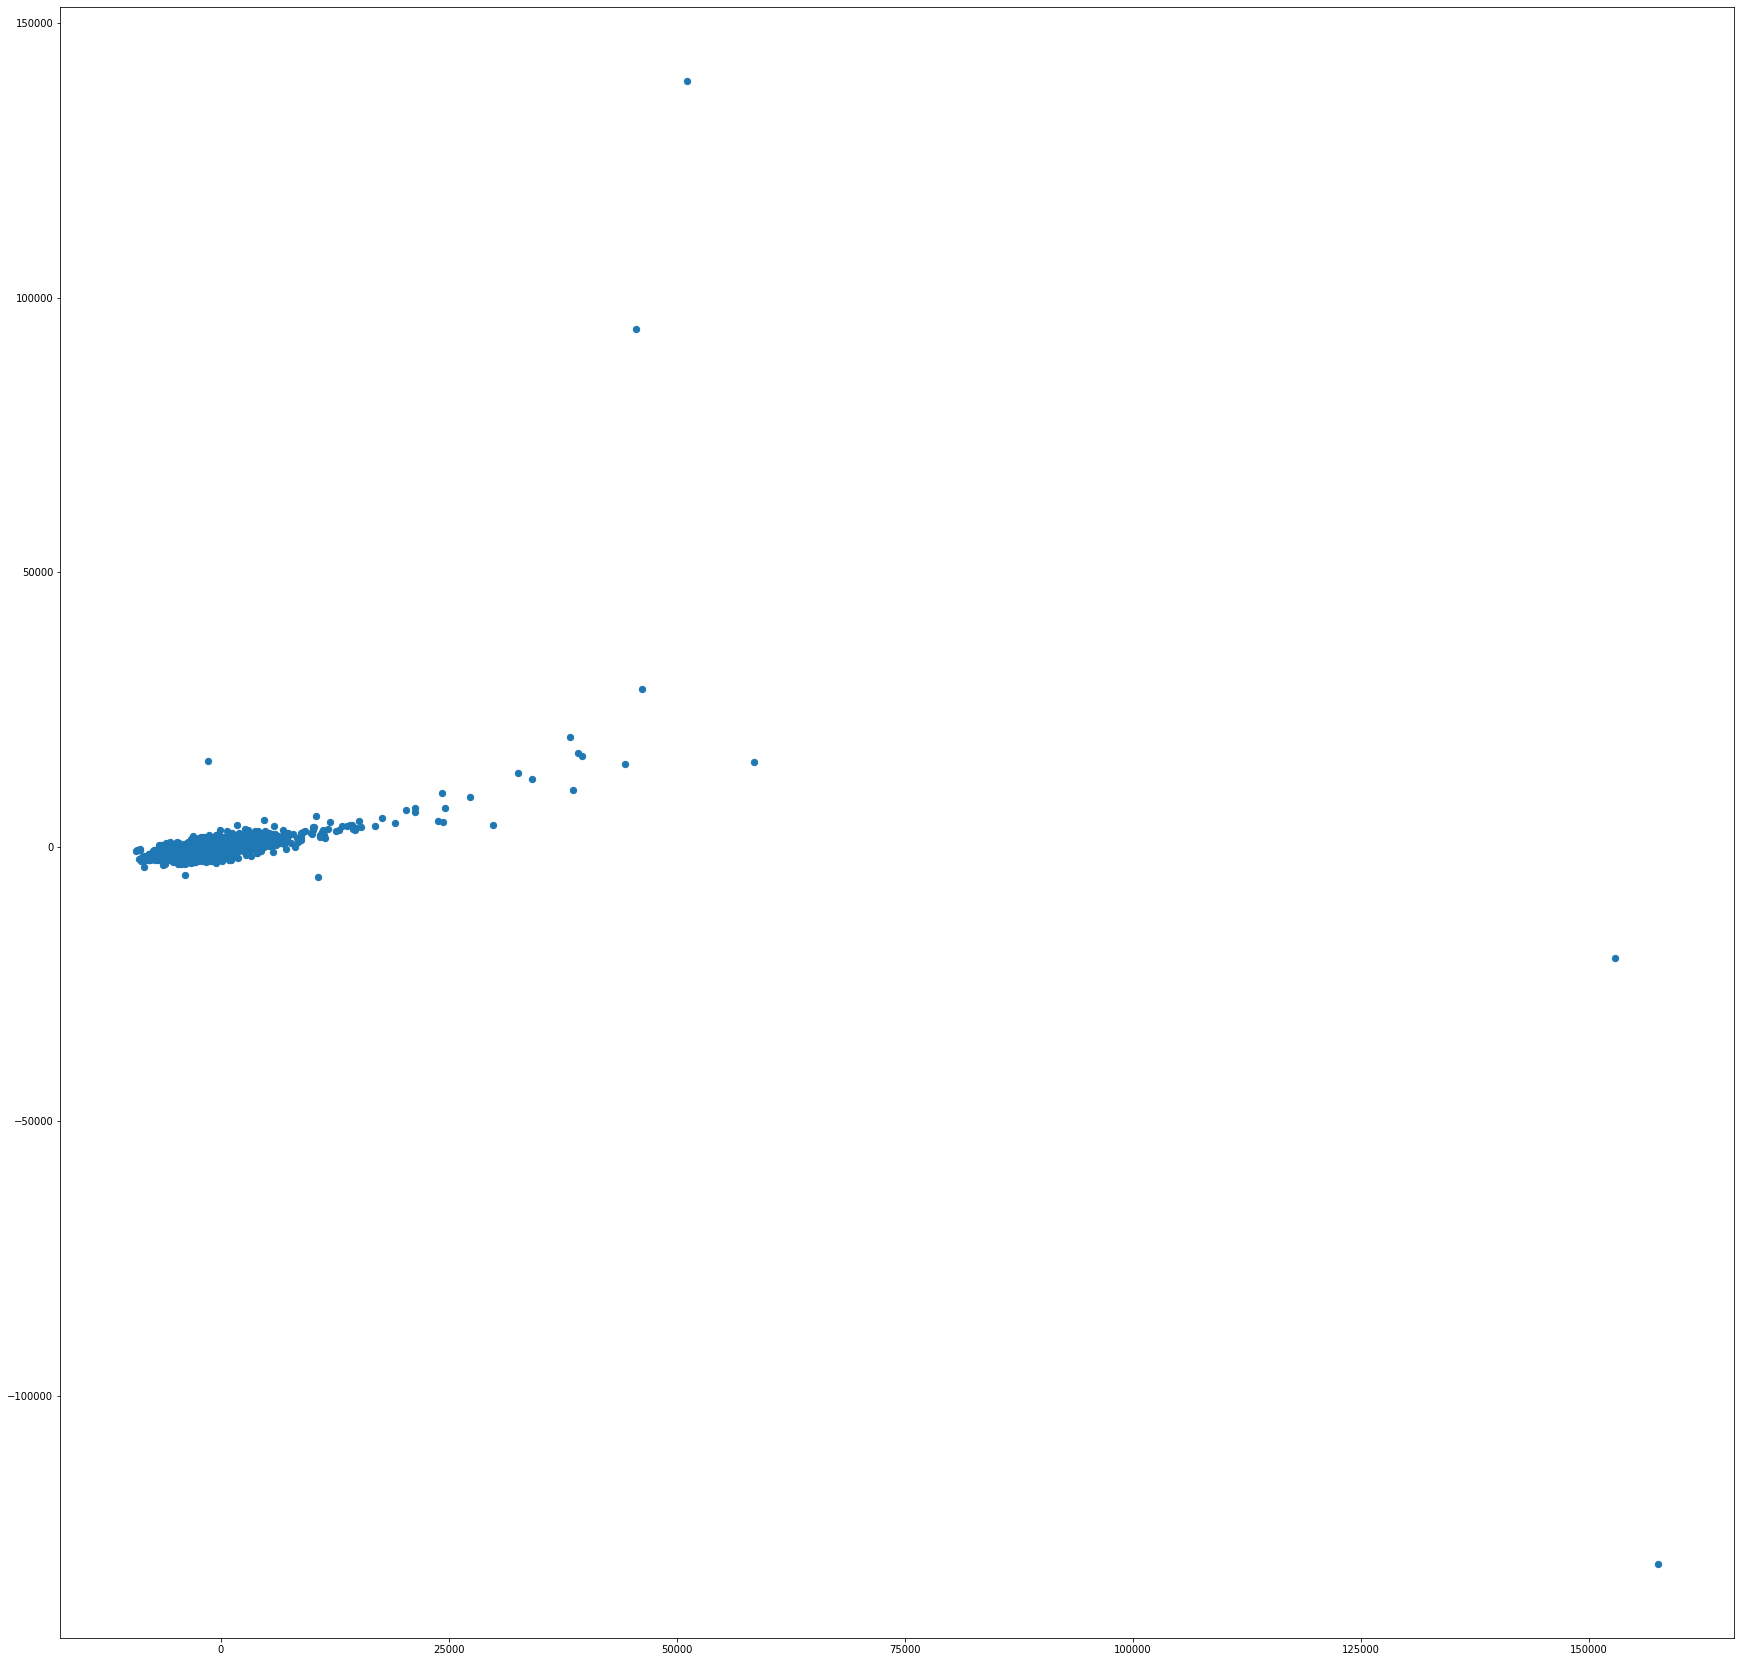

In [30]:
plt.figure(figsize = (30, 30))
plt.scatter(mds_train[:, 0], mds_train[:, 1], s=40)

In [31]:
outliers = []

for i in range(len(mds_train)):
    if (abs(mds_train[:, 1][i]) > 10_000) or (abs(mds_train[:, 0][i]) > 20_000):
        outliers.append(i)

#outliers = set(outliers)
len(outliers)

23

In [32]:
# outliers = [53, 171, 249, 271, 313, 335, 346, 384, 411, 451, 
#                457, 523, 529, 661, 706, 769, 828, 848, 1057, 1169,
#                1184, 1190, 1230, 1287, 1298, 1396]

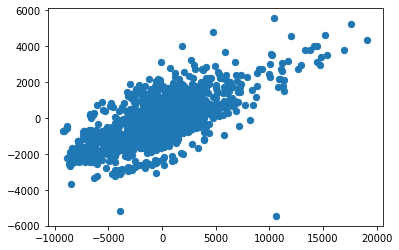

In [33]:
plt.scatter(pd.DataFrame(mds_train).drop(index=outliers).values[:, 0], 
            pd.DataFrame(mds_train).drop(index=outliers).values[:, 1], s=40)

In [34]:
data.drop(index=outliers, inplace=True)
train.drop(index=outliers, inplace=True)
train_target.drop(index=outliers, inplace=True)

## Понижение размерности с помошью TSNE и кластеризация

In [35]:
%%time
tsne = TSNE(n_components=2, random_state=42)

tsne_data = tsne.fit_transform(data)

Wall time: 54.2 s


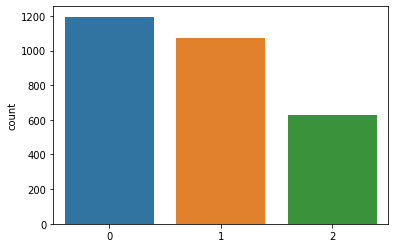

In [36]:
n_clusters = 3
clust = AgglomerativeClustering(n_clusters=n_clusters)
new_class = clust.fit_predict(tsne_data)
sns.countplot(new_class)

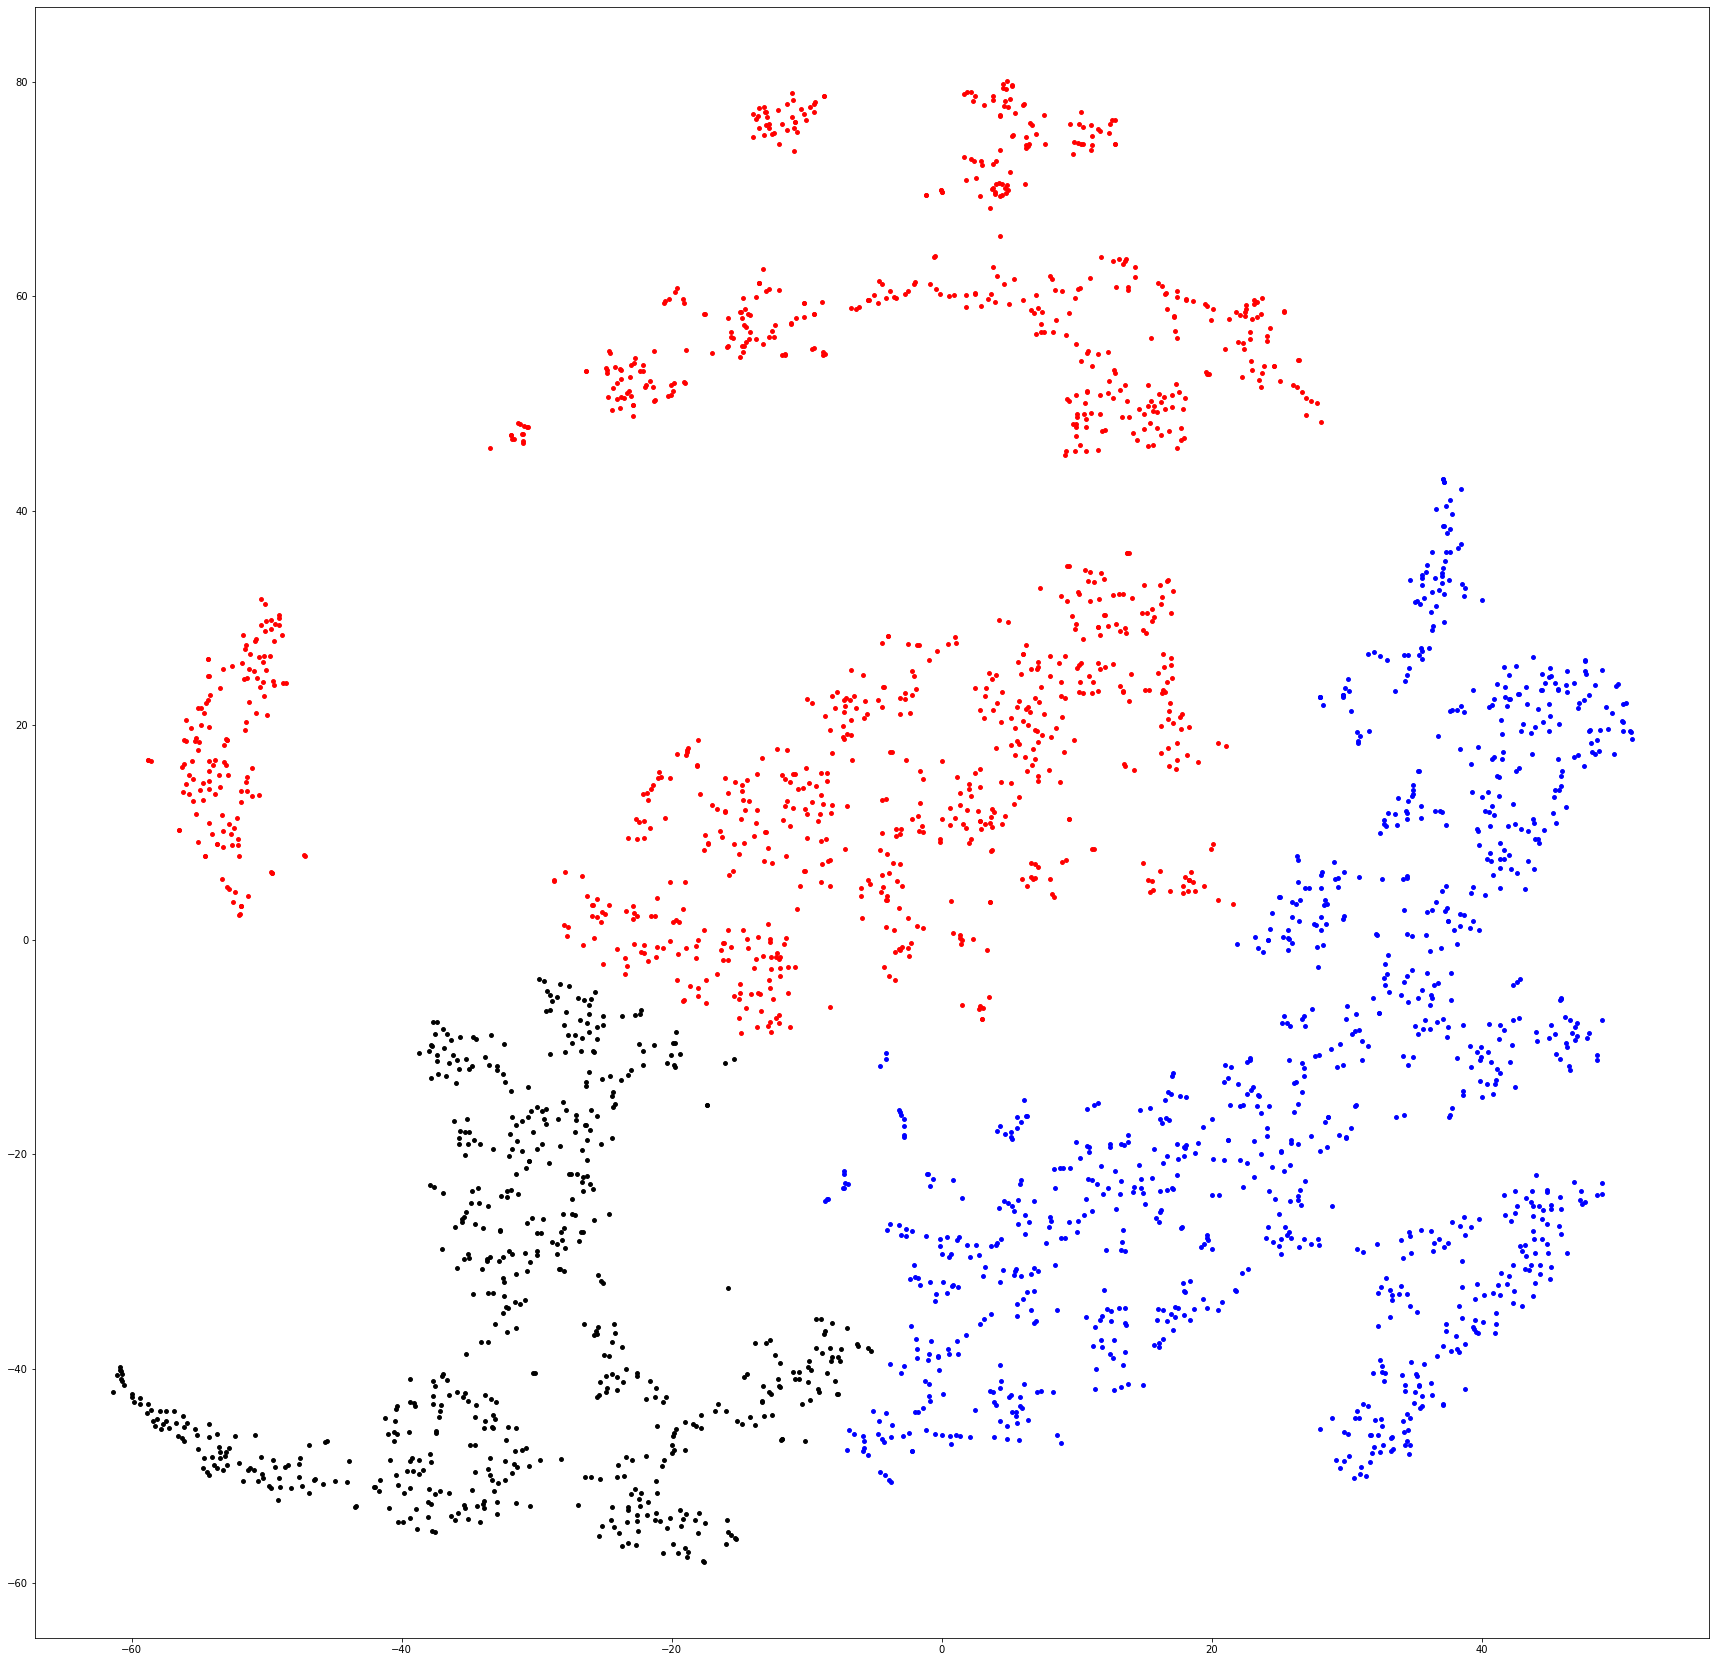

In [37]:
plt.figure(figsize = (30, 30))
color = ['red', 'blue', 'black']

for i in range(n_clusters):
    
    x = random.uniform(0, 0.4)
    y = random.uniform(0, 0.55)
    z = 1 - x- y
    
    plt.scatter(tsne_data[:, 0][new_class == i], tsne_data[:, 1][new_class == i], s=15, c=color[i])

In [38]:
for i in range(1, 5):
    clust = AgglomerativeClustering(n_clusters=3*i)
    new_class = clust.fit_predict(tsne_data)
    data['class_{}'.format(3*i)] = new_class

In [39]:
#data['Class'] = new_class
# вводим новый признак
# До этого хорошо работала кластеризация трейна и теста отдельно на 3 кластера

## Отбор признаков для древоводных моделей

In [41]:
#bestfeatures = SelectKBest(score_func=chi2, k=40)
#fit = bestfeatures.fit(data_for_linear(data)[:train.shape[0]], scaled_target_sqrt)
#
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(train.columns)
#
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']
##print(featureScores.nlargest(60,'Score'))

In [43]:
#%%time
#model = ExtraTreesRegressor(criterion='mae')
#model.fit(data_for_linear(data)[:train.shape[0]], scaled_target_sqrt)

#feat_importances = pd.Series(model.feature_importances_, index=train.columns)
#feat_importances.nlargest(60)

In [ ]:
#feat_importances = pd.Series(model.feature_importances_, index=data_for_linear(data).columns)

In [ ]:
#features_tree=set(list(feat_importances.nlargest(250).index)) # top 66 features by tree classifier
#features_chi=set(list(featureScores.Specs[:40]))# top 40 features by chi square test
# тест на цикле показал наименьшую ошибку у 66 и 40 (уже с добавленным классом)

In [44]:
#union_fe=features_chi.union(features_tree)
#union_fe=list(union_fe)
#len(union_fe)

# Линейные модели

## LassoCV

### Подготовка данных

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import KFold, cross_val_score

In [46]:
def data_for_linear(df):
    one_hot_enc = OneHotEncoder(sparse=False)
    
    cat_enc_data = one_hot_enc.fit_transform(df[cat_features])
    
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(df[num_data.columns]))
    
    data_for_linear = pd.DataFrame(np.hstack((scaled_data, cat_enc_data)))
    return data_for_linear

In [47]:
scaled_target_log = np.log(train_target)

scaled_target_sqrt = np.sqrt(train_target)

In [48]:
lasso = LassoCV(n_jobs=-2, normalize=False, random_state=42)

split = KFold(n_splits=10, shuffle=True, random_state=42)

In [49]:
#data_target.hist(bins=1000)

In [50]:
#from sklearn.mixture import GaussianMixture
#
#EM = GaussianMixture(n_components=2)
#pred = EM.fit_predict(data_target.values.reshape(-1, 1))
# Есть 2 нормальных распределения целевой переменной, но как это использовать не понятно

In [51]:
#data_target[pred == 1].hist(bins=1000)

In [52]:
#data_target[pred == 0].hist(bins=1000)

In [53]:
#fig, axes = plt.subplots(5, 5, figsize=(40, 40), sharey=True)
#for i in range(int(normal_data.shape[1]/4)):
#    normal_data[normal_data.columns[i]].hist(bins=300, ax=axes[i // 5, i % 5])

In [54]:
#fig, axes = plt.subplots(5, 5, figsize=(40, 40), sharey=True)
#for i in range(int(scaled_data.shape[1]/4)):
#    scaled_data[scaled_data.columns[i]].hist(bins=300, ax=axes[i // 5, i % 5])

In [55]:
#sns.pairplot(normal_data[union_fe])

In [56]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LassoCV
#
#train_lasso_data, test_lasso_data, train_lasso_labels, test_lasso_labels = train_test_split(data_for_linear, 
#                                             scaled_target_sqrt, shuffle=True, test_size=0.25, random_state = 137)
#
#                                                                                            
#
#lasso = LassoCV(n_jobs=-2)
#
#param_grid = {
#                'eps' : [0.001, 0.01, 0.0001],
#                'n_alphas' : [100, 50, 200],
#                'normalize' : [True, False]
#}
#
#grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, error_score='mae', cv=2)
#grid_search.fit(X=train_lasso_data, y=train_lasso_labels) 
#
#grid_search.best_estimator_

In [57]:
#data.drop(labels=['prediction_lasso'], inplace=True, axis=1)

In [58]:
%%time
score = []
for i in range(50): 
    
    ix = np.random.randint(0, 10_000)
    train_lasso_data, test_lasso_data, train_lasso_labels, test_lasso_labels = train_test_split(data_for_linear(data)[:train.shape[0]], 
                                                 scaled_target_sqrt, shuffle=True, test_size=0.25, random_state = ix)
    
    lasso.fit(train_lasso_data, train_lasso_labels)
    
    prediction = lasso.predict(test_lasso_data)
    
    score.append(mae(prediction ** 2, test_lasso_labels ** 2))
    
# mae = 14734.11 using not scaled train and scaled sqrt target
# mae = 13142.04 using data_for_linear(data)[:train.shape[0]] and scaled sqrt target

Wall time: 27 s


In [59]:
np.array(score).mean()

13461.261078019195

Хороший результат, но можно улучшить, выкинем неинформативные признаки

In [60]:
a = pd.DataFrame(abs(lasso.coef_), index=data_for_linear(data)[:train.shape[0]].columns, columns=['coef'])

bad_fe_for_linear = a.sort_values(by='coef')[:225].index

In [63]:
#a.sort_values(by='coef')[:220]

In [64]:
#bad_fe_for_linear

In [65]:
%%time
score = []
for i in range(50): 
    
    ix = np.random.randint(0, 10_000)
    train_lasso_data, test_lasso_data, train_lasso_labels, test_lasso_labels = train_test_split(data_for_linear(data)[:train.shape[0]].drop(labels = list(bad_fe_for_linear), axis=1), 
                                                 scaled_target_sqrt, shuffle=True, test_size=0.25, random_state = ix)
    
    lasso.fit(train_lasso_data, train_lasso_labels)
    
    prediction = lasso.predict(test_lasso_data)
    
    score.append(mae(prediction ** 2, test_lasso_labels ** 2))
    
# mae = 12701.75

Wall time: 13.6 s


In [66]:
np.array(score).mean()

13353.386220099183

Так гораздо лучше

In [67]:
cool_train = data_for_linear(data)[:train.shape[0]].drop(labels = list(bad_fe_for_linear), axis=1)

In [68]:
# mae(prediction_lasso ** 2, test_lasso_labels ** 2 )

In [69]:
#mae(np.exp(prediction_lasso), np.exp(test_lasso_labels))
# mae = 12742.159

In [70]:
#lasso.fit(data, data_target)
#train_lasso_data, test_lasso_data, train_lasso_labels, test_lasso_labels = train_test_split(cool_train, 
#                                                 scaled_target_sqrt, shuffle=True, test_size=0.2, random_state=0)
#
#lasso.fit(train_lasso_data, train_lasso_labels)
#
#prediction_lasso = lasso.predict(test_lasso_data)
#mae(prediction_lasso ** 2, test_lasso_labels ** 2 )

## XGBoost

In [71]:
from xgboost import XGBRegressor
#from sklearn.model_selection import GridSearchCV
#
#xgb_reg = XGBRegressor(random_state=42, n_jobs=-2)
#
#param_grid = {
#                'learning_rate' : np.linspace(0.15, 0.18, 4),
#                'max_depth' : [2, 3],
#                'n_estimators' : [300, 500, 800]
#             }
#grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=2, error_score='mae')
#grid_search.fit(X=train_xgb_data, y=train_xgb_labels) 

In [72]:
# grid_search.best_estimator_

In [73]:
#xgb_best_reg = XGBRegressor(learning_rate=0.06556, n_estimators=2000, max_depth = 2, random_state=42, n_jobs=-2)
#xgb_reg = XGBRegressor(learning_rate=0.02, n_estimators=5000, max_depth = 2, random_state=42)

In [74]:
xgb_best_reg = XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=3500, min_child_weight=0, gamma=0, 
                        subsample=0.7, colsample_bytree=0.7, nthread=-1, scale_ps_weight=1, seed=27, reg_alpha=0.00006)


In [75]:
xgb_best_reg.fit(data_for_linear(data)[:train.shape[0]], scaled_target_sqrt)
prediction_xgb = (xgb_best_reg.predict(data_for_linear(data)[train.shape[0]:]))**2

# public mae = 13614.13671

# xgb_best_reg = XGBRegressor(learning_rate=0.06556, n_estimators=2000, max_depth = 2, random_state=42, n_jobs=-2)

# public mae = 14020.66299

# Такие результаты были с удалением большого числа выбросов и TSNE на 15 кластеров, если удалить около 20 выбросов
# и кластеризовать 3, 6 ... 15 кластеров, public mae = 12994.17 

[16:06:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
output = pd.DataFrame({'Id': test_id,
                       'SalePrice': prediction_xgb})
output.to_csv('submission_xgb.csv', index=False)
# public mae = 12994.17 

## Catboost

In [77]:
from catboost import CatBoostRegressor

#catboost_reg  = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=3, loss_function='MAE')
# mae = 13561.49
#catboost_reg  = CatBoostRegressor(iterations=2000, learning_rate=0.01, depth=4, loss_function='MAE')
# mae = 14128.34
catboost_reg  = CatBoostRegressor(iterations=2000, learning_rate=0.065, depth=3, loss_function='MAE')
# mae = 13340.954193122136

In [78]:
%%time
count = []
    
for i in range(10):
    
    ix = np.random.randint(0, 10_000)
    train_catboost_data, test_catboost_data, train_catboost_labels, test_catboost_labels = train_test_split(data_for_linear(data)[:train.shape[0]], 
                                        scaled_target_sqrt, shuffle=True, test_size=0.2, random_state=ix)
    
    catboost_reg.fit(X=train_catboost_data, y=train_catboost_labels)
    
    prediction_catboost = catboost_reg.predict(test_catboost_data)
    count.append(met.mean_absolute_error(test_catboost_labels ** 2, prediction_catboost ** 2))
    
count

0:	learn: 61.5221074	total: 62.6ms	remaining: 2m 5s
1:	learn: 59.1679409	total: 67ms	remaining: 1m 6s
2:	learn: 56.9469600	total: 72.4ms	remaining: 48.2s
3:	learn: 55.0375566	total: 77.7ms	remaining: 38.8s
4:	learn: 53.0033054	total: 81.9ms	remaining: 32.7s
5:	learn: 51.3625762	total: 87ms	remaining: 28.9s
6:	learn: 49.5210425	total: 91ms	remaining: 25.9s
7:	learn: 48.1047481	total: 95.2ms	remaining: 23.7s
8:	learn: 46.8581665	total: 99.7ms	remaining: 22.1s
9:	learn: 45.5979452	total: 104ms	remaining: 20.7s
10:	learn: 44.3872654	total: 108ms	remaining: 19.5s
11:	learn: 43.0146072	total: 112ms	remaining: 18.5s
12:	learn: 42.0384105	total: 116ms	remaining: 17.8s
13:	learn: 41.0205155	total: 120ms	remaining: 17.1s
14:	learn: 39.9085878	total: 125ms	remaining: 16.5s
15:	learn: 38.9087103	total: 129ms	remaining: 16s
16:	learn: 38.0374737	total: 134ms	remaining: 15.6s
17:	learn: 37.2594903	total: 137ms	remaining: 15.1s
18:	learn: 36.2279612	total: 142ms	remaining: 14.8s
19:	learn: 35.2843115

[12299.311532043432,
 15571.375179374465,
 12529.973644448019,
 15071.722198270274,
 15093.05423243119,
 13804.911424994007,
 13157.500575220552,
 13489.883590854355,
 11616.444660428368,
 13444.814146961664]

In [79]:
np.array(count).mean()

13607.899118502633

In [80]:
catboost_reg.fit(data_for_linear(data)[:train.shape[0]], scaled_target_sqrt)
prediction_catboost = (catboost_reg.predict(data_for_linear(data)[train.shape[0]:]))**2
prediction_catboost

0:	learn: 61.3107311	total: 3.14ms	remaining: 6.27s
1:	learn: 58.7790976	total: 7.08ms	remaining: 7.07s
2:	learn: 56.5377689	total: 10.5ms	remaining: 6.96s
3:	learn: 54.4957624	total: 13.4ms	remaining: 6.68s
4:	learn: 52.4749928	total: 17.3ms	remaining: 6.91s
5:	learn: 50.6890968	total: 21.9ms	remaining: 7.29s
6:	learn: 49.1065568	total: 30.6ms	remaining: 8.71s
7:	learn: 47.5125900	total: 35.1ms	remaining: 8.75s
8:	learn: 46.2107974	total: 39.2ms	remaining: 8.67s
9:	learn: 44.6866276	total: 42.4ms	remaining: 8.43s
10:	learn: 43.3771178	total: 45.4ms	remaining: 8.2s
11:	learn: 42.1320319	total: 48.5ms	remaining: 8.03s
12:	learn: 41.0135290	total: 51.6ms	remaining: 7.89s
13:	learn: 40.1180275	total: 54.9ms	remaining: 7.79s
14:	learn: 39.1355402	total: 57.9ms	remaining: 7.67s
15:	learn: 38.2354428	total: 61.9ms	remaining: 7.68s
16:	learn: 37.3409317	total: 65ms	remaining: 7.58s
17:	learn: 36.5114317	total: 68.2ms	remaining: 7.51s
18:	learn: 35.6944030	total: 71.2ms	remaining: 7.42s
19:	le

array([128637.31525287, 161892.23938556, 186964.47030589, ...,
       170810.31499024, 116334.83859056, 233672.84562523])

In [81]:
output = pd.DataFrame({'Id': test_id,
                       'SalePrice': prediction_catboost})
output.to_csv('submission_catboost.csv', index=False)
# public mae = 13070.65

## Ridge

In [82]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()

In [83]:
%%time
count = []
    
for i in range(25):
    
    ix = np.random.randint(0, 10_000)
    train_ridge_data, test_ridge_data, train_ridge_labels, test_ridge_labels = train_test_split(data_for_linear(data)[:train.shape[0]], 
                                        scaled_target_sqrt, shuffle=True, test_size=0.2, random_state=ix)
    
    ridge.fit(X=train_ridge_data, y=train_ridge_labels)
    
    prediction_ridge = ridge.predict(test_ridge_data)
    count.append(met.mean_absolute_error(test_ridge_labels ** 2, prediction_ridge ** 2))
    
#count

Wall time: 6.55 s


In [84]:
np.array(count).mean()

13526.23983540461

In [85]:
ridge.fit(data_for_linear(data)[:train.shape[0]], scaled_target_sqrt)
prediction_ridge = (ridge.predict(data_for_linear(data)[train.shape[0]:]))**2
prediction_ridge

array([117165.37013718, 133510.93813034, 186365.25612644, ...,
       175715.37796543, 115650.17664569, 220427.3422964 ])

In [86]:
output = pd.DataFrame({'Id': test_id,
                       'SalePrice': prediction_ridge})
output.to_csv('submission_ridge.csv', index=False)
# public mae = 13547.85

## Stacking

In [93]:
#from mlxtend.regressor import StackingCVRegressor
#
#stack = StackingCVRegressor(regressors=(ridge, xgb_best_reg, catboost_reg),
#                            meta_regressor=xgb_best_reg,
#                            random_state=42, n_jobs=-2)
#
#for clf, label in zip([svr, lasso, rf, stack], ['SVM', 'Lasso', 
#                                                'Random Forest', 
#                                                'StackingCVRegressor']):
#    scores = cross_val_score(clf, X, y, cv=5)
#    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
#        scores.mean(), scores.std(), label))

In [92]:
#%%time
#stack.fit(data_for_linear(data)[:train.shape[0]], scaled_target_sqrt)

In [91]:
#prediction_stack = stack.predict(data_for_linear(data)[train.shape[0]])
#prediction_stack

In [95]:
prediction_stack = (prediction_ridge*0.35 + prediction_catboost*0.30 + prediction_xgb*0.35).reshape(1459, )

In [ ]:
#model.fit(data_for_linear(data)[:train.shape[0]], scaled_target_sqrt)
#
#prediction = (model.predict(data_for_linear(data)[train.shape[0]:])) ** 2
#
#prediction
#
## public mae =(Huber) 13728.31

In [ ]:
#model.fit(data_for_linear(data)[:train.shape[0]], scaled_target_sqrt)
#
#prediction = (model.predict(data_for_linear(data)[train.shape[0]:])) ** 2
#
#prediction
#
## public mae9=(ridge) = 13547.85

In [96]:
output = pd.DataFrame({'Id': test_id,
                       'SalePrice': prediction_stack})
output.to_csv('final_submission.csv', index=False)

In [ ]:
#%%time
#
#split = KFold(n_splits=10, shuffle=True, random_state=42)
#
#cv_scores = cross_val_score(catboost_reg, X=data_for_linear(data)[:train.shape[0]], 
#                            y=train_target, scoring='neg_mean_absolute_error', cv=10)
#
#cv_scores.mean()